In [3]:
import requests
import pandas as pd
response = requests.get(
url = "https://api.energidataservice.dk/dataset/Elspotprices?offset=0&start=2014-01-01T00:00&filter=%7B%22PriceArea%22:[%22DK1%22,%22DK2%22]%7D&sort=HourUTC%20DESC" )
result = response.json()
print_ = False
records = result.get('records', [])
df = pd.DataFrame(records)
df.index = pd.to_datetime(df['HourDK'])
df.set_index(df.index, inplace=True)
# drop cols HourDK and HourUTC
df.drop(['HourDK', 'HourUTC'], axis=1, inplace=True)
print(df.head())

                    PriceArea  SpotPriceDKK  SpotPriceEUR
HourDK                                                   
2024-07-03 23:00:00       DK1    513.900024     68.900002
2024-07-03 23:00:00       DK2    513.900024     68.900002
2024-07-03 22:00:00       DK1    655.239990     87.849998
2024-07-03 22:00:00       DK2    677.390015     90.820000
2024-07-03 21:00:00       DK1    784.130005    105.129997


In [4]:
df_price_DK1 = df[df['PriceArea'] == 'DK1']
df_price_DK2 = df[df['PriceArea'] == 'DK2']

In [13]:
response = requests.get(
    url='https://api.energidataservice.dk/dataset/RegulatingBalancePowerdata?offset=0&start=2014-01-01T00:00&sort=HourUTC%20DESC')

result = response.json()

# for k, v in result.items():
#     print(k, v)

records = result.get('records', [])

df = pd.DataFrame(records)

df.index = pd.to_datetime(df['HourDK'])
df.set_index(df.index, inplace=True)

df.head()


,HourUTC,HourDK,PriceArea,mFRRUpActBal,mFRRDownActBal,mFRRUpActSpec,mFRRDownActSpec,ImbalanceMWh,ImbalancePriceEUR,ImbalancePriceDKK,BalancingPowerPriceUpEUR,BalancingPowerPriceUpDKK,BalancingPowerPriceDownEUR,BalancingPowerPriceDownDKK
HourDK,,,,,,,,,,,,,,
2024-07-03 23:00:00,2024-07-03T21:00:00,2024-07-03T23:00:00,DK1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-03 23:00:00,2024-07-03T21:00:00,2024-07-03T23:00:00,DK2,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-03 22:00:00,2024-07-03T20:00:00,2024-07-03T22:00:00,DK2,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-03 22:00:00,2024-07-03T20:00:00,2024-07-03T22:00:00,DK1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-03 21:00:00,2024-07-03T19:00:00,2024-07-03T21:00:00,DK1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_imb_price_DK1 = df[df['PriceArea'] == 'DK1']
df_imb_price_DK2 = df[df['PriceArea'] == 'DK2']
import matplotlib.pyplot as plt 


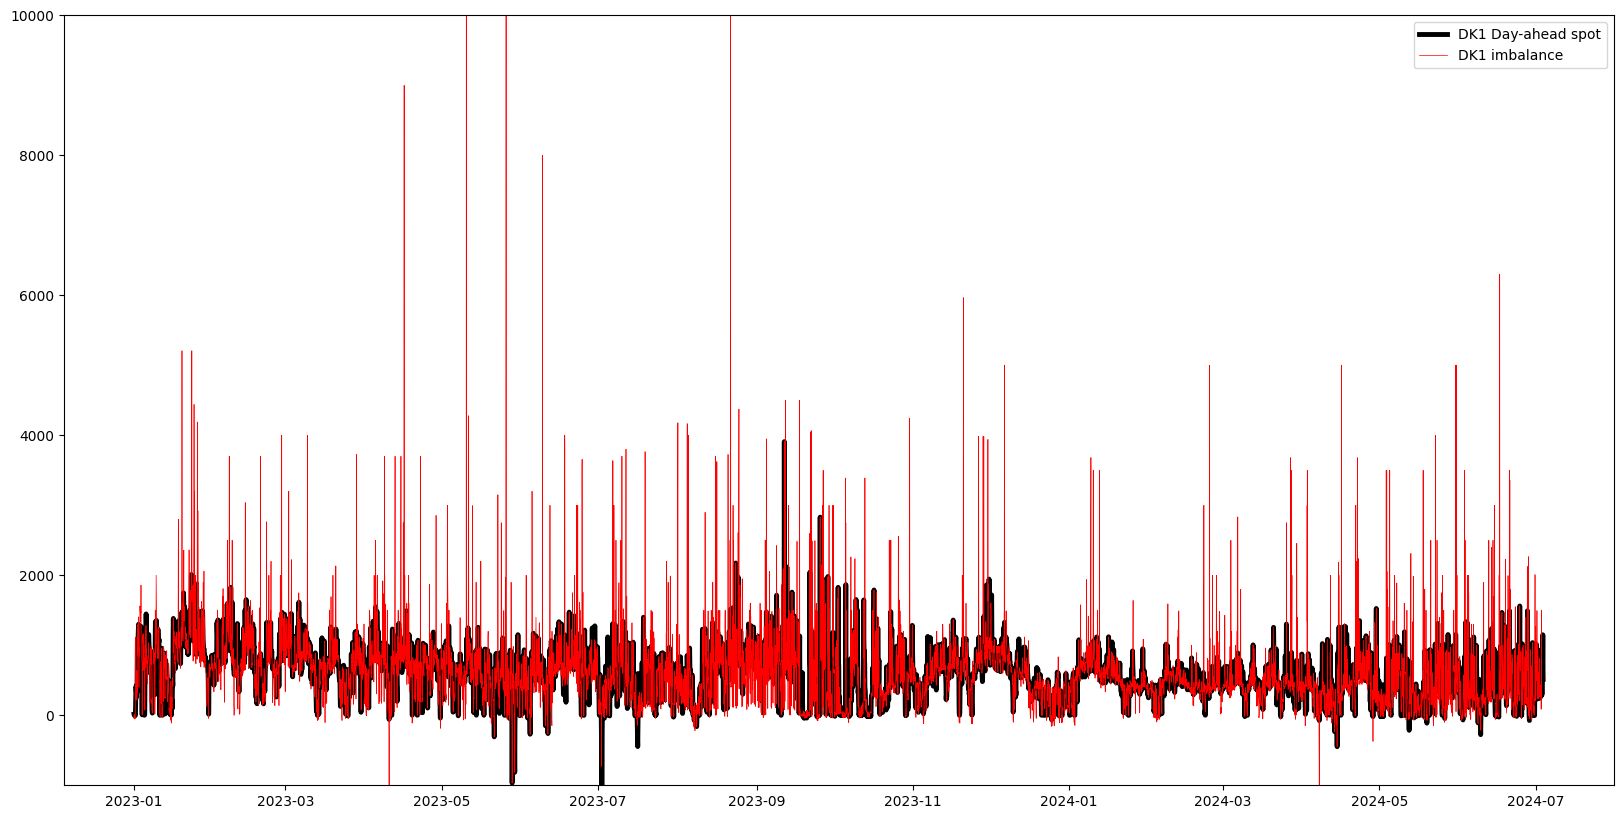

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df_price_DK1['SpotPriceDKK'][df_price_DK1['SpotPriceDKK'].index.year > 2022 ], linewidth=3.5, label='DK1 Day-ahead spot', color = "black")
plt.plot(df_imb_price_DK1["ImbalancePriceDKK"][df_imb_price_DK1.index.year > 2022].dropna(), linewidth=0.5, label='DK1 imbalance', color = "red")
# plt.plot(df_imb_price_DK2["ImbalancePriceDKK"][df_imb_price_DK2.index.year > 2022].dropna(), linewidth=0.5, label='DK2 imbalance', color = "blue")
plt.ylim(-1000, 10000)
plt.legend()

In [45]:
idx_1 = df_imb_price_DK1["ImbalancePriceDKK"][df_imb_price_DK1.index.year > 2022].dropna().index
idx_2 = df_price_DK1['SpotPriceDKK'][df_price_DK1['SpotPriceDKK'].index.year > 2022 ].dropna().index
common_idx = idx_1.intersection(idx_2)  # find common index

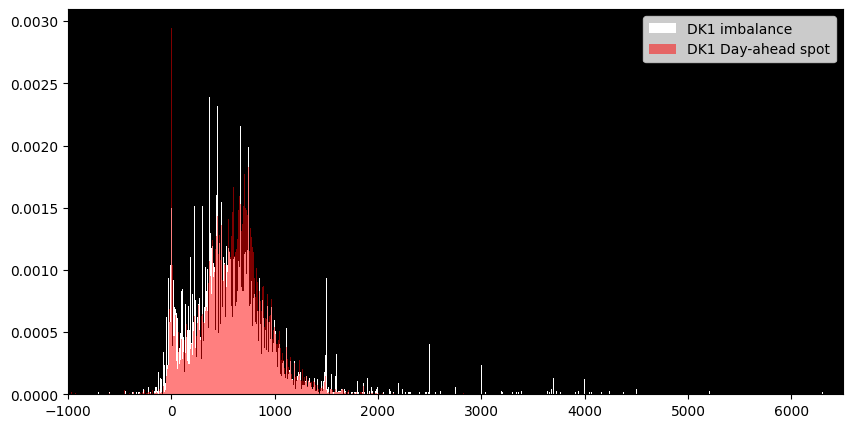

In [75]:
plt.figure(figsize=(10,5))
# plt set black baground
plt.gca().set_facecolor('black')
plt.hist(df_imb_price_DK1["ImbalancePriceDKK"].loc[common_idx][df_imb_price_DK1["ImbalancePriceDKK"].loc[common_idx] != 0], density=True, bins=10000,  alpha=1, color='white', label='DK1 imbalance')
plt.hist(df_price_DK1['SpotPriceDKK'].loc[common_idx][df_price_DK1['SpotPriceDKK'].loc[common_idx] != 0], density=True, bins=1000,alpha=0.5, color='red', label='DK1 Day-ahead spot')
plt.xlim(-1000, 6500)
plt.legend()
plt.savefig("imb_vs_spot_price_hist.pdf")
plt.show()

# Load data to trade (logic) on

In [77]:
# Loading the ensembles and actuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set working directory
import os
os.chdir("/Users/bastian/Library/CloudStorage/Dropbox/DTU (Semester 10)/MscThesis/MscThesisCode_NN/")
actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
ensembles_DK1_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed_v2.pkl")

Y_DK1_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK1_SolarPower = actuals["SolarPower"]

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
ensembles_DK2_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK2_fixed_v2.pkl")
Y_DK2_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK2_SolarPower = actuals["SolarPower"]


SDE_CE_DK1_OffshoreWindPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_OffshoreWindPower_lstm.pkl")
SDE_CE_DK1_OnshoreWindPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_OnshoreWindPower_lstm.pkl")
SDE_CE_DK2_OffshoreWindPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_OffshoreWindPower_lstm.pkl")

SDE_CE_DK1_OnshoreWindPower_ffnn = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_OnshoreWindPower_FFNN.pkl")
SDE_CE_DK2_OffshoreWindPower_ffnn = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_OffshoreWindPower_FFNN.pkl")

SDE_CE_DK1_SolarPower_ffnn = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_SolarPower_FFNN.pkl")
SDE_CE_DK2_SolarPower_ffnn = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_SolarPower_FFNN.pkl")
SDE_CE_DK1_SolarPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK1_SolarPower_lstm.pkl")
SDE_CE_DK2_SolarPower_lstm = pd.read_pickle("sde_ensembles/mean_sde_quantile__DK2_SolarPower_lstm.pkl")


In [87]:
orig_ens = ensembles_DK1_offshorewindpower
orig_ens["e25"]

date
2022-01-01 00:00:00     949.330000
2022-01-01 01:00:00     896.920000
2022-01-01 02:00:00     834.380000
2022-01-01 03:00:00     764.850000
2022-01-01 04:00:00     718.400000
                          ...     
2024-02-20 19:00:00    1034.926597
2024-02-20 20:00:00     986.951172
2024-02-20 21:00:00     953.140389
2024-02-20 22:00:00     989.976903
2024-02-20 23:00:00    1029.888403
Name: e25, Length: 18744, dtype: float64

In [120]:
# we should here prep the TAQR predictions, and not the SDE ensembles...
from functions_for_TAQR import one_step_quantile_prediction

def run_one_step_quantile_prediction(ensembles, actuals, quantiles):
    y_preds = {}
    y_actuals = {}
    for q in quantiles:
        y_pred, y_actual, BETA = one_step_quantile_prediction(ensembles.values, actuals.values, 200, len(actuals), q, False)
        y_preds[q] = y_pred
        y_actuals[q] = y_actual
    return y_preds, y_actuals

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
ensembles  = SDE_CE_DK1_OffshoreWindPower_lstm
actuals = Y_DK1_OffshoreWindPower.loc[ensembles.index]
y_preds_SDE, y_actuals_SDE = run_one_step_quantile_prediction(ensembles, actuals, quantiles)

idx =ensembles.index[201:-1]

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
ensembles  = ensembles_DK1_offshorewindpower.loc[SDE_CE_DK1_OffshoreWindPower_lstm.index]
actuals = Y_DK1_OffshoreWindPower.loc[ensembles.index]
y_preds_ORIG, y_actuals_ORIG = run_one_step_quantile_prediction(ensembles, actuals, quantiles)


df_SDE_preds = pd.DataFrame(y_preds_SDE, index=idx)
df_ORIG_preds = pd.DataFrame(y_preds_ORIG, index=idx)


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  7 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


We predict higher in 38.97% of the cases
Total bank: 11915.44


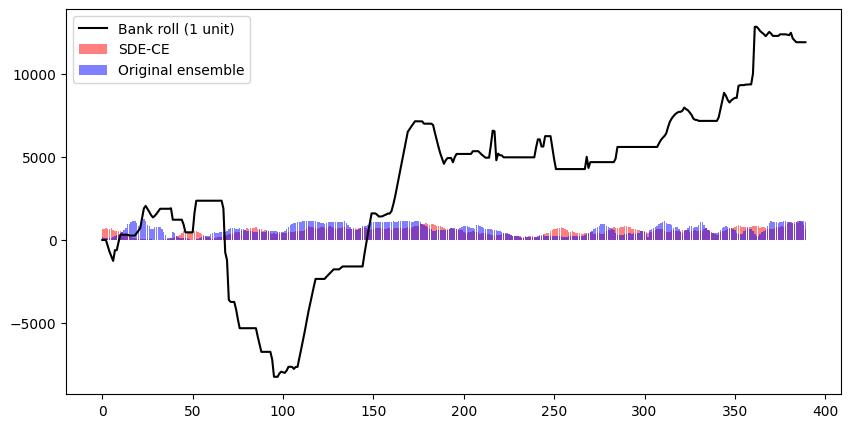

In [127]:
sde_ce = df_SDE_preds
orig_ens = df_ORIG_preds
i = 0
TotalBank = []
# in DK1 offshore wind power lstm, they are higher in 62 % of the cases
for hour_ in sde_ce.index:
    if sde_ce[0.5].loc[hour_] > orig_ens[0.5].loc[hour_]:
        # then we predict lower prices in imbalance vs spot
        # thus sell spot and buy imbalance, i.e. we are short!
        bank = - df_price_DK1['SpotPriceDKK'].loc[hour_] + df_imb_price_DK1["ImbalancePriceDKK"].loc[hour_]
        i += 1
    elif sde_ce[0.5].loc[hour_] < orig_ens[0.5].loc[hour_]:
        # then we predict higher prices in imbalance vs spot
        # thus buy spot and sell imbalance, i.e. we are long!
        bank = df_price_DK1['SpotPriceDKK'].loc[hour_] - df_imb_price_DK1["ImbalancePriceDKK"].loc[hour_]
    TotalBank.append(bank)

print(f"We predict higher in {i/ len(sde_ce.index):.2%} of the cases")
print(f"Total bank: {np.sum(TotalBank):.2f}")

# plt.figure(figsize=(10,5))
# plt.plot(np.cumsum(TotalBank), label = "Bank roll (1 unit)", color = "black")
# plt.bar(x = np.arange(len(TotalBank)), height = sde_ce[0.5].values, alpha=0.5, color='red', label = "SDE-CE")
# plt.bar(x = np.arange(len(TotalBank)), height = orig_ens[0.5].loc[sde_ce.index].values, alpha=0.5, color='blue', label = "Original ensemble")

# plt.legend()
# plt.show()

## Main plot

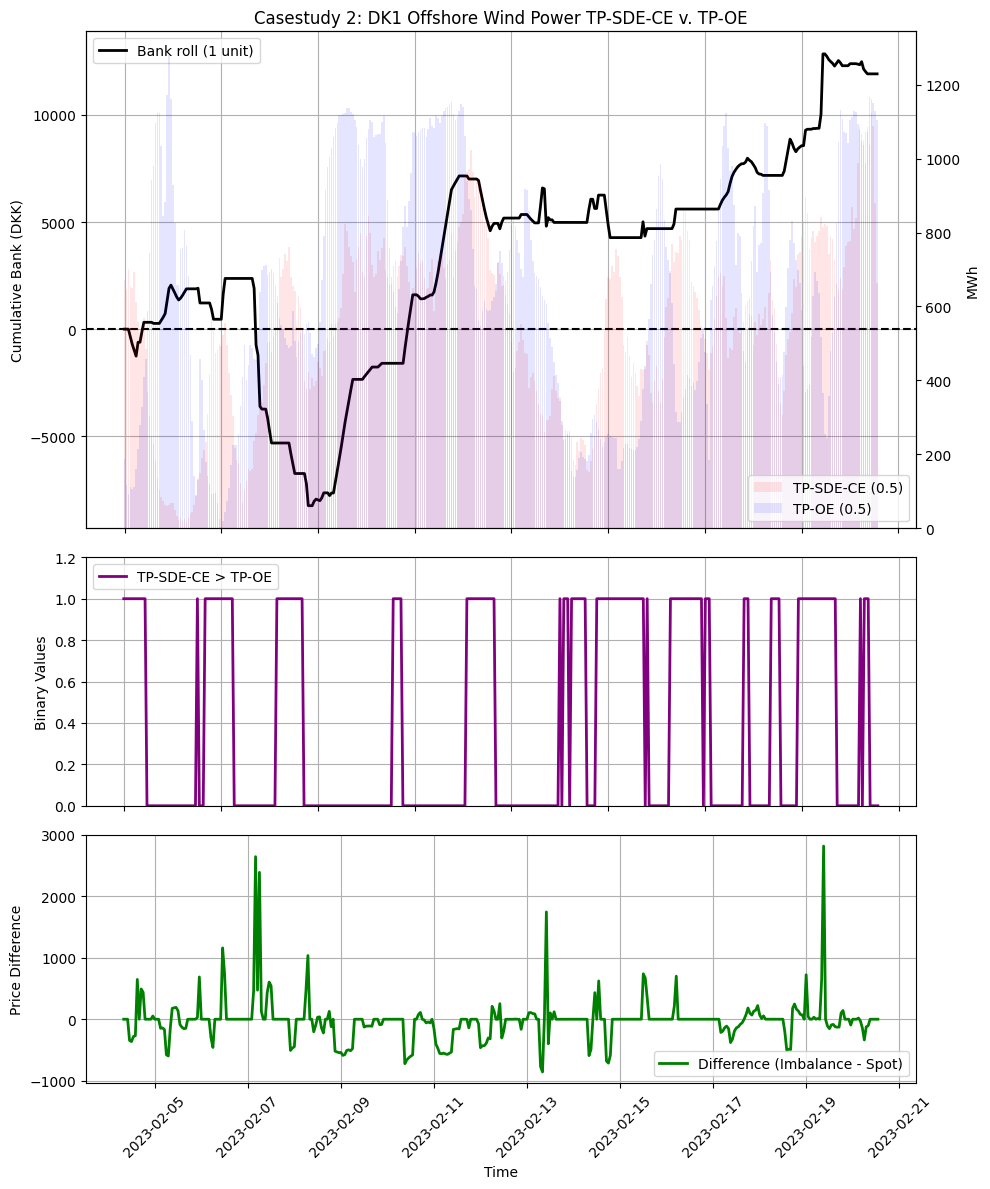

In [156]:
Difference = df_imb_price_DK1["ImbalancePriceDKK"].loc[sde_ce.index] - df_price_DK1['SpotPriceDKK'].loc[sde_ce.index]


# Calculate the binary values for whether TP-SDE-CE is higher than TP-OE
binary_values = (sde_ce[0.5].values > orig_ens[0.5].values).astype(int)

# Create the third subplot with the other two
fig, (ax1, ax3, ax2) = plt.subplots(3, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 1, 1]})

ax1.plot(np.cumsum(TotalBank), label="Bank roll (1 unit)", color="black", linewidth=2)
ax1_2 = ax1.twinx()
ax1_2.bar(x=np.arange(len(TotalBank)), height=sde_ce[0.5].values, alpha=0.1, color='red', label="TP-SDE-CE (0.5)")
ax1_2.bar(x=np.arange(len(TotalBank)), height=orig_ens[0.5].loc[sde_ce.index].values, alpha=0.1, color='blue', label="TP-OE (0.5)")
ax1.set_xticklabels([])
ax1.legend(loc='upper left')
ax1_2.legend(loc='lower right')
ax1.set_ylabel("Cumulative Bank (DKK)")
ax1_2.set_ylabel("MWh")
ax1.grid()
ax1.axhline(0, color="black", linestyle="--")
plt.title("Casestudy 2: DK1 Offshore Wind Power TP-SDE-CE v. TP-OE")

ax2.plot(Difference, label="Difference (Imbalance - Spot)", color="green", linewidth=2)
ax2.legend()
ax2.set_ylabel("Price Difference")
ax2.set_xlabel("Time")
# rotate x labels 45
for label in ax2.get_xticklabels():
    label.set_rotation(45)
ax2.grid()
ax3.plot(binary_values, label="TP-SDE-CE > TP-OE", color="purple", linewidth=2)
ax3.set_ylabel("Binary Values")
ax3.legend(loc="upper left")
ax3.set_ylim(0, 1.2)
ax3.set_xticklabels([])
ax3.grid()
plt.tight_layout()
plt.savefig("CS2_TP_SDE_CE_vs_TP_OE.pdf")
plt.show()

## Function logic to generate it

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions_for_TAQR import one_step_quantile_prediction

def run_one_step_quantile_prediction(ensembles, actuals, quantiles):
    y_preds = {}
    y_actuals = {}
    for q in quantiles:
        y_pred, y_actual, BETA = one_step_quantile_prediction(ensembles.values, actuals.values, 200, len(actuals), q, False)
        y_preds[q] = y_pred
        y_actuals[q] = y_actual
    return y_preds, y_actuals

def generate_plot_and_save(ensembles, actuals, sde_ensembles, prices, imbalance_prices, plotname):
    quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

    # Running predictions for original ensembles
    y_preds_ORIG, y_actuals_ORIG = run_one_step_quantile_prediction(ensembles, actuals, quantiles)
    # Running predictions for SDE ensembles
    y_preds_SDE, y_actuals_SDE = run_one_step_quantile_prediction(sde_ensembles, actuals, quantiles)

    idx = ensembles.index[201:-1]

    df_SDE_preds = pd.DataFrame(y_preds_SDE, index=idx)
    df_ORIG_preds = pd.DataFrame(y_preds_ORIG, index=idx)

    sde_ce = df_SDE_preds
    orig_ens = df_ORIG_preds
    TotalBank = []
    i = 0

    # Calculate bank roll based on the predictions
    for hour_ in sde_ce.index:
        if sde_ce[0.5].loc[hour_] > orig_ens[0.5].loc[hour_]:
            bank = - prices['SpotPriceDKK'].loc[hour_] + imbalance_prices["ImbalancePriceDKK"].loc[hour_]
            i += 1
        elif sde_ce[0.5].loc[hour_] < orig_ens[0.5].loc[hour_]:
        # then we predict higher prices in imbalance vs spot
        # thus buy spot and sell imbalance, i.e. we are long!
            bank = prices['SpotPriceDKK'].loc[hour_] - imbalance_prices["ImbalancePriceDKK"].loc[hour_] 
        TotalBank.append(bank)

    print(f"We predict higher in {i/ len(sde_ce.index):.2%} of the cases")
    total_bank_sum = np.sum(TotalBank)
    
    print(f"Total bank: {total_bank_sum:.2f}, for {plotname}")

    Difference = imbalance_prices["ImbalancePriceDKK"].loc[sde_ce.index] - prices['SpotPriceDKK'].loc[sde_ce.index]
    binary_values = (sde_ce[0.5].values > orig_ens[0.5].values).astype(int)

    fig, (ax1, ax3, ax2) = plt.subplots(3, 1, figsize=(10, 12), gridspec_kw={'height_ratios': [2, 1, 1]})

    ax1.plot(np.cumsum(TotalBank), label="Bank roll (1 unit)", color="black", linewidth=2)
    ax1_2 = ax1.twinx()
    ax1_2.bar(x=np.arange(len(TotalBank)), height=sde_ce[0.5].values, alpha=0.1, color='red', label="TP-SDE-CE (0.5)")
    ax1_2.bar(x=np.arange(len(TotalBank)), height=orig_ens[0.5].loc[sde_ce.index].values, alpha=0.1, color='blue', label="TP-OE (0.5)")
    ax1.set_xticklabels([])
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='lower right')
    ax1.set_ylabel("Cumulative Bank (DKK)")
    ax1_2.set_ylabel("MWh")
    ax1.grid()
    ax1.axhline(0, color="black", linestyle="--")
    plt.title(f"Casestudy 2: TP-SDE-CE v. TP-OE - {plotname}")

    ax2.plot(Difference, label="Difference (Imbalance - Spot)", color="green", linewidth=2)
    ax2.legend()
    ax2.set_ylabel("Price Difference")
    ax2.set_xlabel("Time")
    for label in ax2.get_xticklabels():
        label.set_rotation(45)
    ax2.grid()
    ax3.plot(binary_values, label="TP-SDE-CE > TP-OE", color="purple", linewidth=2)
    ax3.set_ylabel("Binary Values")
    ax3.legend(loc="upper left")
    ax3.set_ylim(0, 1.2)
    ax3.set_xticklabels([])
    ax3.grid()
    plt.tight_layout()
    plt.savefig(f"CS2_TP_SDE_CE_vs_TP_OE_{plotname}.pdf")
    # plt.show()

# Example usage:
actuals = Y_DK1_OffshoreWindPower.loc[ensembles.index]
sde_ensembles = SDE_CE_DK1_OffshoreWindPower_lstm
ensembles = ensembles_DK1_offshorewindpower.loc[sde_ensembles.index]
prices = df_price_DK1
imbalance_prices = df_imb_price_DK1
plotname = "example_plot"

# generate_plot_and_save(ensembles, actuals, sde_ensembles, prices, imbalance_prices, plotname)

## Looping through all combinations

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  7 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 38.97% of the cases
Total bank: 11915.44, for DK1_OffshoreWindPower_lstm


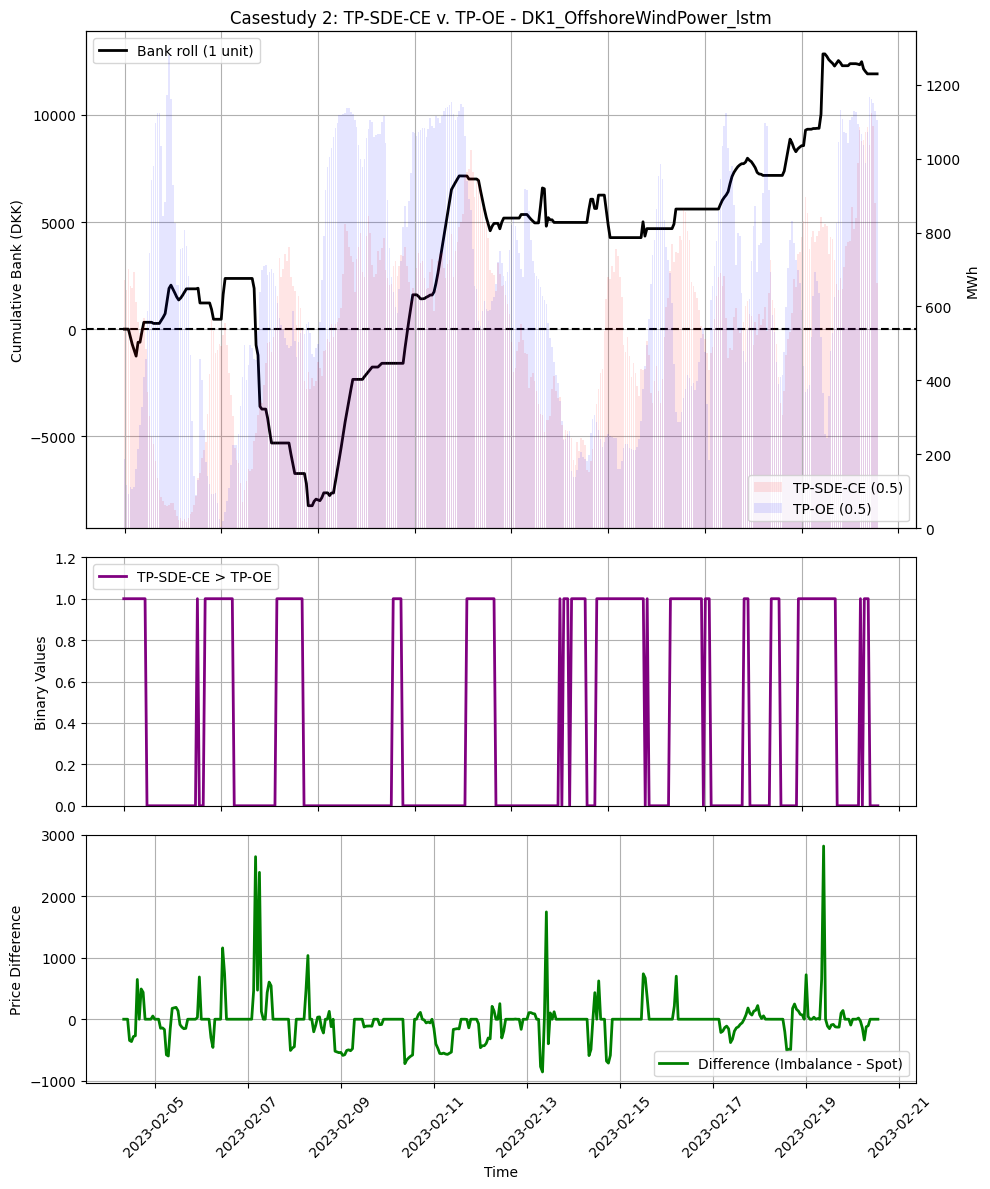

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  4 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 35.38% of the cases
Total bank: 12202.96, for DK1_OnshoreWindPower_lstm


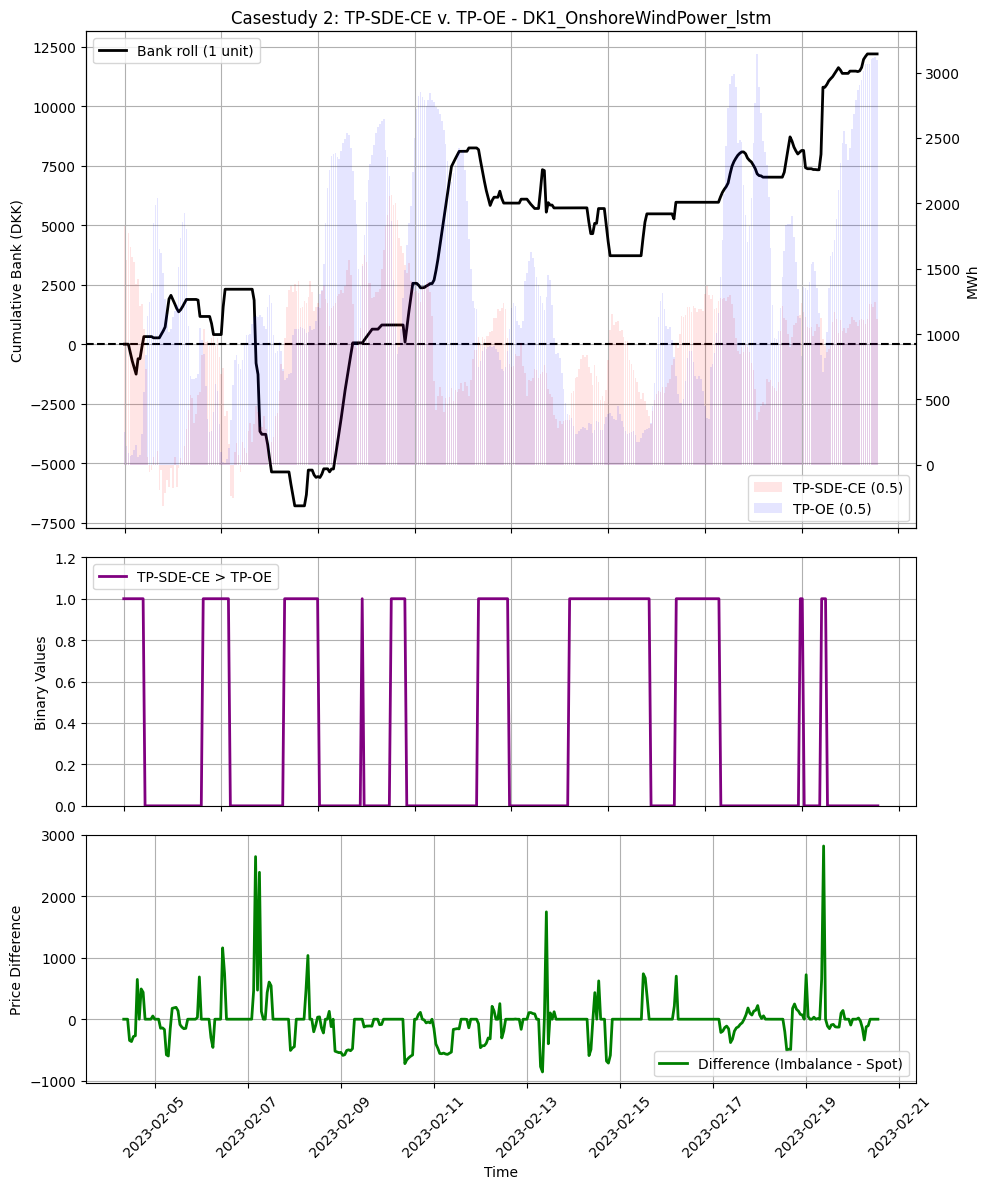

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  4 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve

Fejl i rq.fit.br(x, y, tau = tau, ...) : Singular design matrix
Kald: rq -> rq.fit -> rq.fit.br
Kørsel stoppet
Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  4
4 r_init zeros
An error occurred for DK2_OffshoreWindPower_lstm: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 25 is different from 4)
There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  4 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 39.20% of the cases
Total bank: -12824.72, for DK1_OnshoreWindPower_ffnn


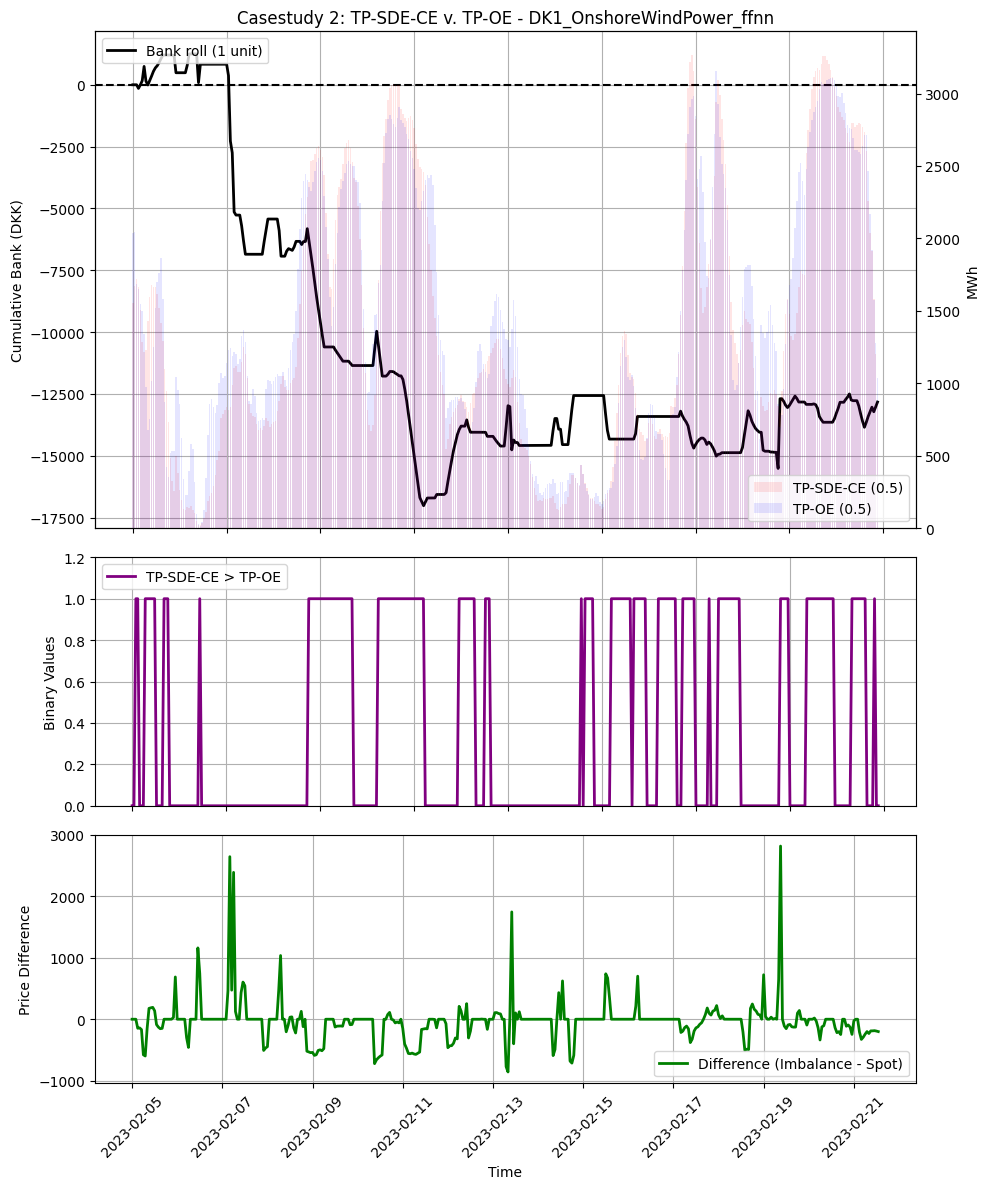

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 50.75% of the cases
Total bank: 7390.46, for DK2_OffshoreWindPower_ffnn


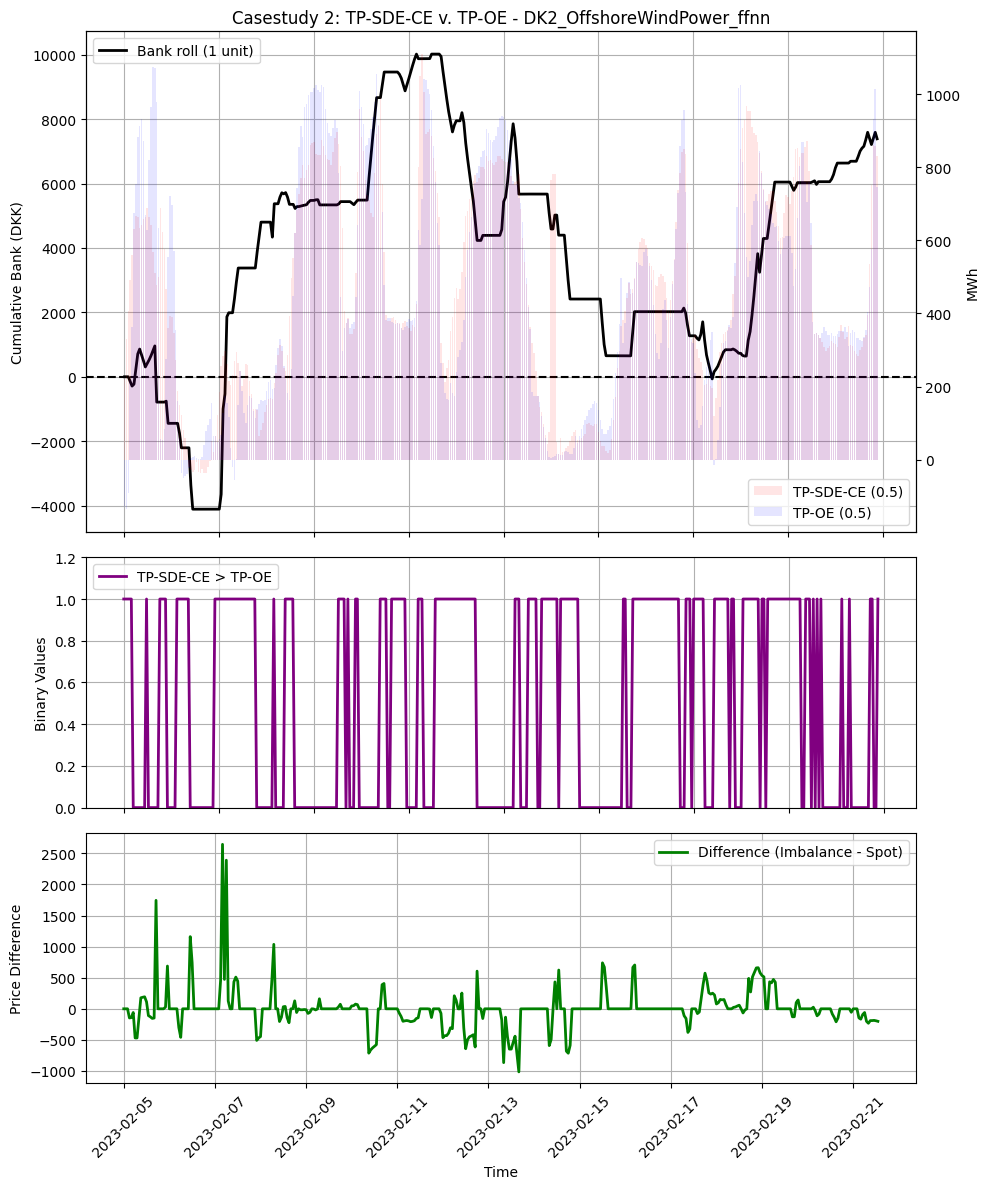

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  6 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 26.52% of the cases
Total bank: -11709.17, for DK1_SolarPower_ffnn


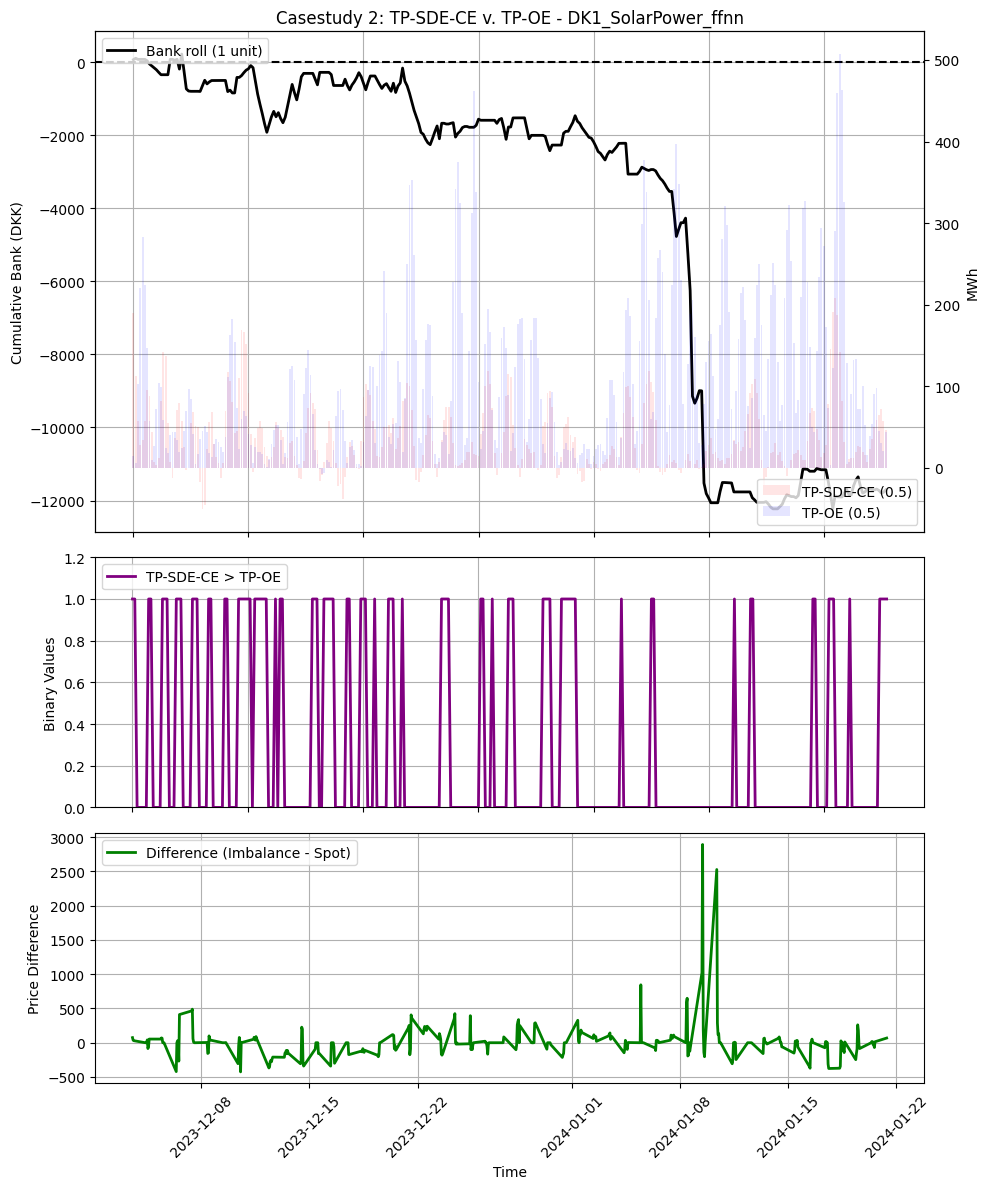

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  4 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  4 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 51.79% of the cases
Total bank: 5001.71, for DK2_SolarPower_ffnn


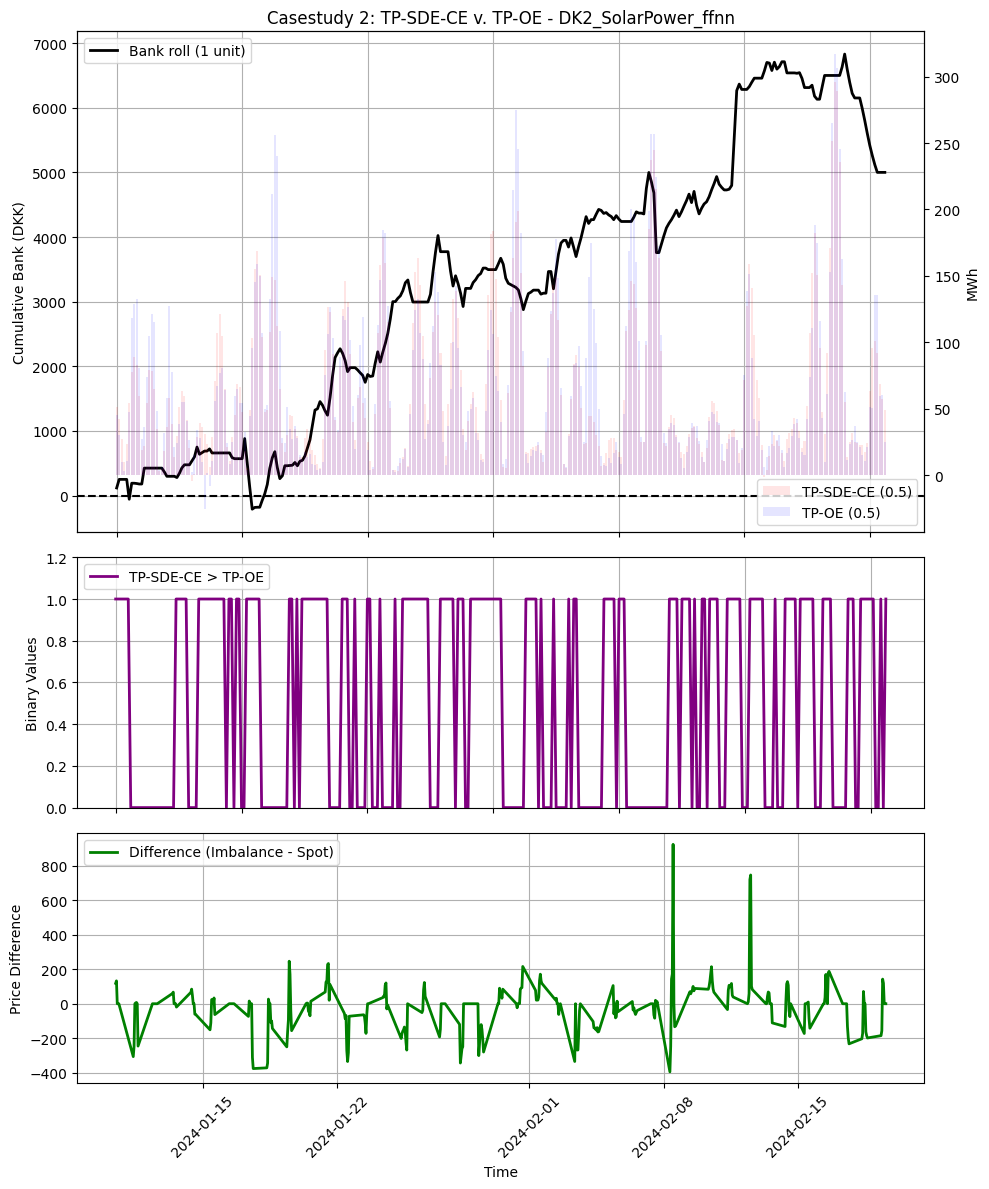

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  6 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 33.54% of the cases
Total bank: -11657.39, for DK1_SolarPower_lstm


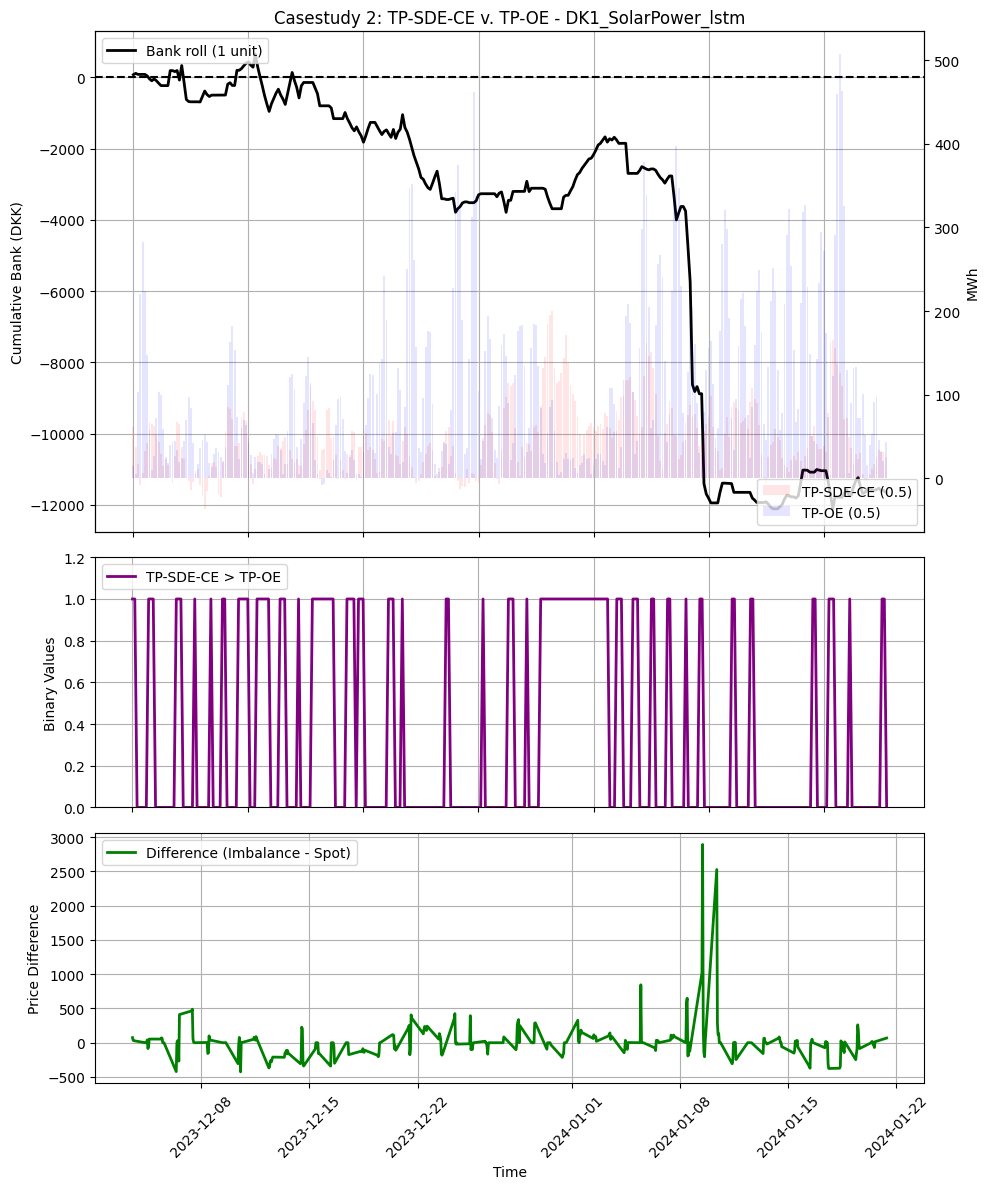

Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 25 close to zeroes
p:  25
25 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  0 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  1 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  3 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros


Indlæser krævet pakke: SparseM

Vedhæfter pakke: ‘SparseM’

Det følgende objekt er maskeret fra ‘package:base’:

    backsolve



There is:  2 zeros in residuals and 4 close to zeroes
p:  4
4 r_init zeros
We predict higher in 47.56% of the cases
Total bank: -5276.27, for DK2_SolarPower_lstm


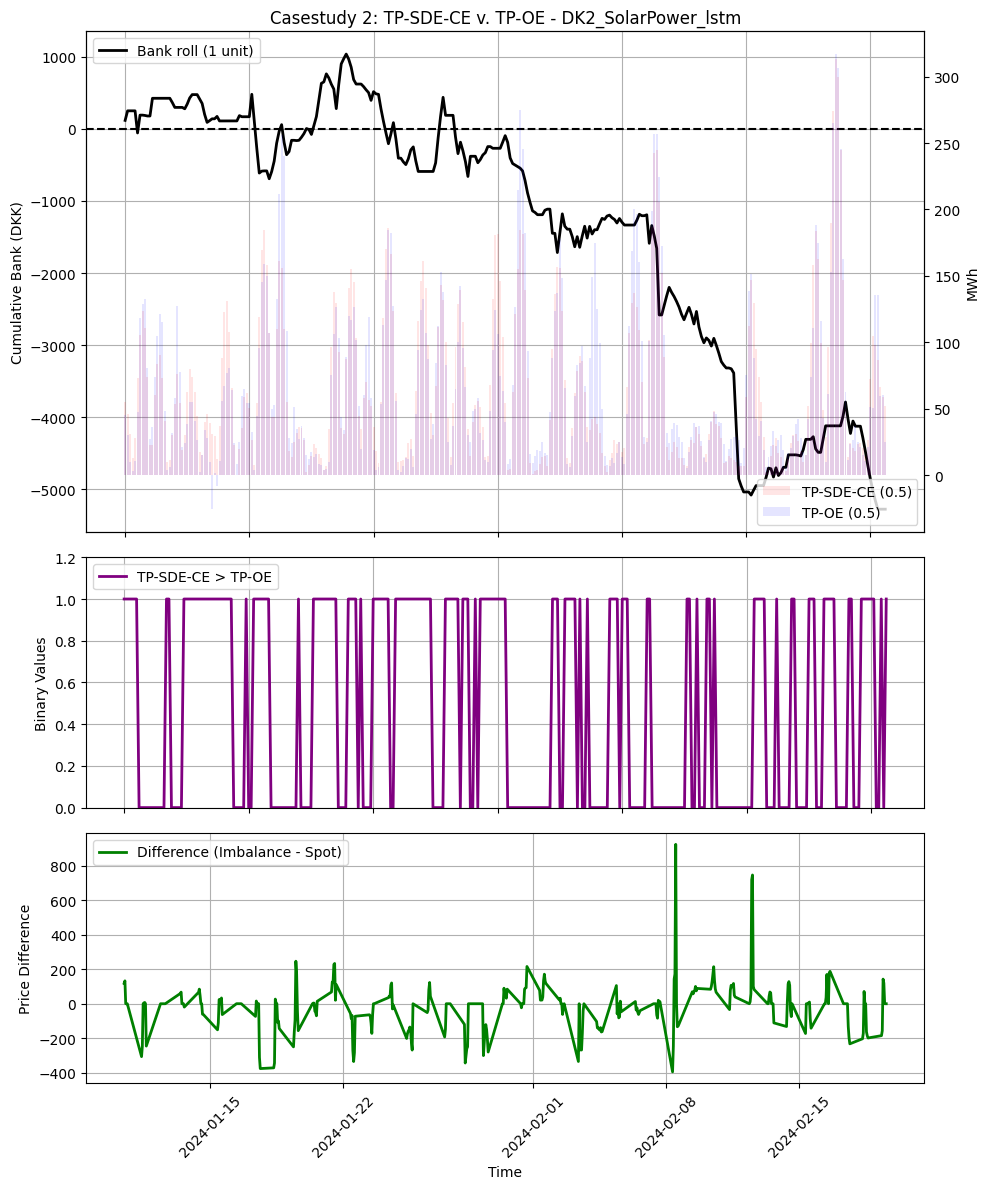

In [166]:
import pandas as pd


# Load the SDE ensembles data
sde_ensembles_dict = {
    "DK1_OffshoreWindPower_lstm": SDE_CE_DK1_OffshoreWindPower_lstm,
    "DK1_OnshoreWindPower_lstm": SDE_CE_DK1_OnshoreWindPower_lstm,
    "DK2_OffshoreWindPower_lstm": SDE_CE_DK2_OffshoreWindPower_lstm,
    "DK1_OnshoreWindPower_ffnn": SDE_CE_DK1_OnshoreWindPower_ffnn,
    "DK2_OffshoreWindPower_ffnn": SDE_CE_DK2_OffshoreWindPower_ffnn,
    "DK1_SolarPower_ffnn": SDE_CE_DK1_SolarPower_ffnn,
    "DK2_SolarPower_ffnn": SDE_CE_DK2_SolarPower_ffnn,
    "DK1_SolarPower_lstm": SDE_CE_DK1_SolarPower_lstm,
    "DK2_SolarPower_lstm": SDE_CE_DK2_SolarPower_lstm
}



# Generate plots for each SDE ensemble
for key, sde_ensembles in sde_ensembles_dict.items():
    if "DK1" in key:
        if "OffshoreWindPower" in key:
            actuals = Y_DK1_OffshoreWindPower.loc[sde_ensembles.index]
            ensembles = ensembles_DK1_offshorewindpower.loc[sde_ensembles.index]
        elif "OnshoreWindPower" in key:
            actuals = Y_DK1_OnshoreWindPower.loc[sde_ensembles.index]
            ensembles = ensembles_DK1_onshorewindpower.loc[sde_ensembles.index]
        elif "SolarPower" in key:
            actuals = Y_DK1_SolarPower.loc[sde_ensembles.index]
            ensembles = ensembles_DK1_solarpower.loc[sde_ensembles.index]
        prices = df_price_DK1
        imbalance_prices = df_imb_price_DK1
    elif "DK2" in key:
        if "OffshoreWindPower" in key:
            actuals = Y_DK2_OffshoreWindPower.loc[sde_ensembles.index]
            ensembles = ensembles_DK2_offshorewindpower.loc[sde_ensembles.index]
        elif "OnshoreWindPower" in key:
            actuals = Y_DK2_OnshoreWindPower.loc[sde_ensembles.index]
            ensembles = ensembles_DK2_onshorewindpower.loc[sde_ensembles.index]
        elif "SolarPower" in key:
            actuals = Y_DK2_SolarPower.loc[sde_ensembles.index]
            ensembles = ensembles_DK2_solarpower.loc[sde_ensembles.index]
        prices = df_price_DK2
        imbalance_prices = df_imb_price_DK2
    plotname = f"{key}"
    try:
        generate_plot_and_save(ensembles, actuals, sde_ensembles, prices, imbalance_prices, plotname)
    except Exception as e:
        print(f"An error occurred for {key}: {e}")

# Getting training and test set dates

In [174]:

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
ensembles_DK1_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed_v2.pkl")
n = len(actuals.index)
print(n)
print("0%: ", actuals.index[0])
print("75%: ", actuals.index[np.floor(n*0.75).astype(int)])
print("76%: ", actuals.index[np.floor(n*0.76).astype(int)])
print("90%: ", actuals.index[np.floor(n*0.90).astype(int)])
print("100%: ", actuals.index[-1])


18720
0%:  2022-01-01 00:00:00
75%:  2023-08-09 00:00:00
76%:  2023-08-16 19:00:00
90%:  2023-12-04 00:00:00
100%:  2024-02-19 23:00:00
